In [13]:
from skimage import io, img_as_ubyte, img_as_float
from skimage.filters import threshold_otsu

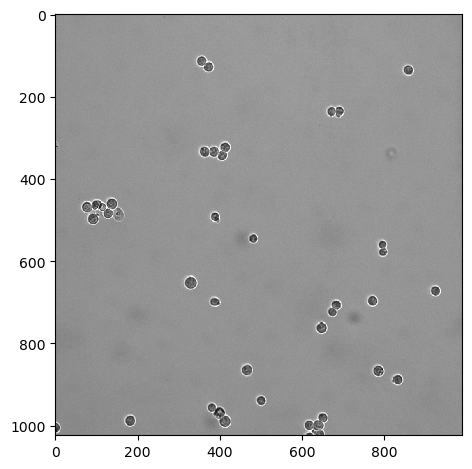

In [9]:
in_dir = "data/Xcelligence_data/Xcelligence_data/"
im_name = "240305134144P2_01h45m25s_A6_1W.tif"
im_org = io.imread(in_dir+im_name)
io.imshow(im_org)

In [10]:
def histogram_stretch(img_in):
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = 0.0
    max_desired = 1.0
	
    # Do something here

    img_out = ((max_desired-min_desired)/(max_val-min_val))*(img_float-min_val)+min_desired

    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)

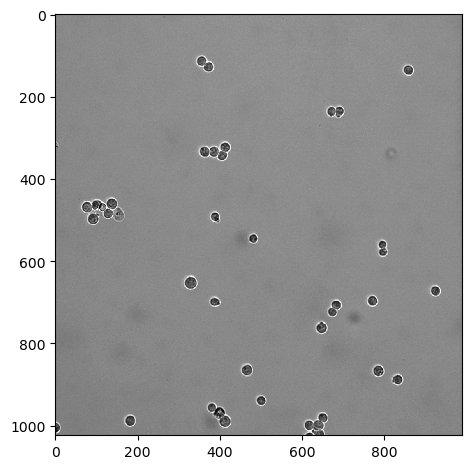

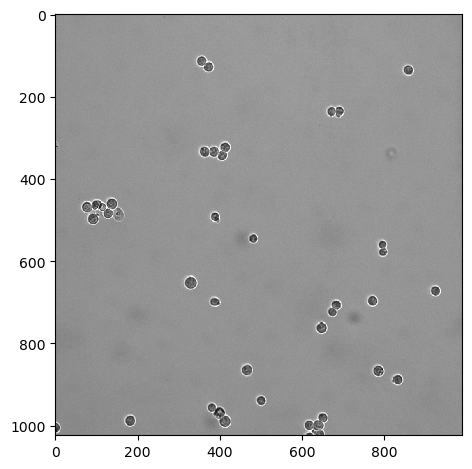

In [12]:
im_stretched = histogram_stretch(im_org)
io.imshow(im_stretched)
io.show()
io.imshow(im_org)
io.show()

In [14]:
def threshold_image(img_in, threshold):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    thresholded_img = img_in > threshold
    img_out = img_in.copy()
    img_out[thresholded_img] = 255
    img_out[~thresholded_img] = 0
    return img_out

def otsu_threshold_img(img):
    threshold = threshold_otsu(img)
    img_out = threshold_image(img, threshold)
    return img_out

C:\Users\Magnus\AppData\Local\Temp\ipykernel_13612\1475342857.py:15: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (1024, 990, 3) looks like that of an RGB image.
  threshold = threshold_otsu(img)


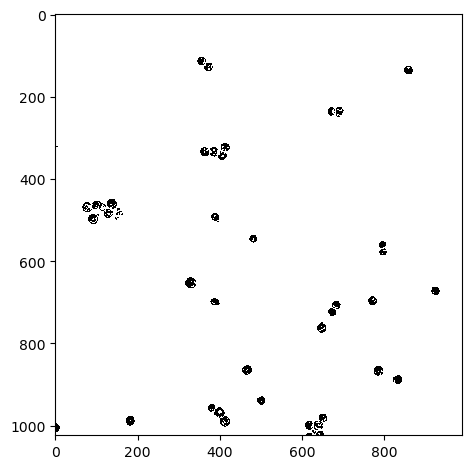

In [15]:
im_otsu = otsu_threshold_img(im_stretched)
io.imshow(im_otsu)
io.show()